# <span style=color:blue>Part 1: Introduction </span>

### <span style=color:green>Idea: </span>

#### For as long as I can remember, I was always a huge music fan. From listening to Pop hits by Maroon 5, rock classics by Foo Fighters, Japanese bangers by Yorushika or funky Korean beats from NCT, it has been an integral part of my life. I love music because of how it makes me feel. Whether it's nostalgic if a song reminds me of a moment, excited through a high-energy beat, or depressed through a sad tune, it's the piece of art I feel most attached to. It's this exact love and passion for music that led me to this project, where I plan to explore and evaluate data from Spotifyfy, YouTube, and TikTok based on different music-related statistics

### <span style=color:green>Goal: </span>

#### I want to explore what factors help explain the performance for Spotify Streams as well as train/evaluate a model based on our factors. As a Spotify User, I am curious to what trends and varaibles may contribute to the amount of streams a song may acheive. For example, I'm sure there would bew a correlation across views with all 3 platforms (TikTok, YouTube, Spotify) because if a song is successful on one platform, naturally it would do well on the rest. Training and evaluating a model will help us see if it can create a linear model given certain predictors, and how well it is able to explain new predictions

### <span style=color:green>Dataset: </span>

#### I pulled the following dataset off of the popular online platform, Kaggle. The dataset was made by the user: Nidula Elgiriyewithana, who compiled the data with a variety of different variables.

# <span style=color:blue>Part 2: Load and Inspect Dataset </span>

### <span style=color:green>Importing Packages </span>

In [4]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import math

#Specifc tools needed for condition checking:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Tools needed for K-folds:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

#PCA:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

##K-Means:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### <span style=color:green>Loading the Dataset </span>

In [5]:
#Because I am going to update this df and change values, this df will be called the old_spotify_df
old_spotify_df = pd.read_csv('C:/Users/alexd/Downloads/Projects/Spotify Data Analysis/Spotify_Data.csv', encoding='latin1')

### <span style=color:green>Exploring Dataset </span>

In [6]:
#Checks the datatypes and columns
old_spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

##### We have a lot of columns, with many that we do not need, we will keep note of this when we proceed with data cleaning

# <span style=color:blue>Step 3: Data Cleaning</span>

### <span style=color:green>Getting rid of Unnecessary Columns </span>

In [7]:
old_spotify_df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [8]:
updated_spotify_df = old_spotify_df
updated_spotify_df.drop(columns =['TIDAL Popularity', 'Soundcloud Streams', 'Pandora Track Stations', 'Pandora Streams', 'Amazon Playlist Count',
                 'Deezer Playlist Reach', 'Deezer Playlist Count', 'SiriusXM Spins', 'AirPlay Spins', 'Apple Music Playlist Count',
                 'YouTube Playlist Reach', 'Shazam Counts','TikTok Likes', 'TikTok Posts','ISRC', 'Spotify Playlist Reach'])

,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Views,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,1,725.4,"390,470,936","30,716",92.0,"84,274,754","1,713,126","5,332,281,936",0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,2,545.9,"323,703,884","28,113",92.0,"116,347,040","3,486,739","208,339,025",1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,3,538.4,"601,309,283","54,331",92.0,"122,599,116","2,228,730","3,369,120,610",0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,4,444.9,"2,031,280,633","269,802",85.0,"1,096,100,899","10,629,796","14,603,725,994",0
4,Houdini,Houdini,Eminem,5/31/2024,5,423.3,"107,034,922","7,223",88.0,"77,373,957","3,670,188",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,"4,585",19.4,"305,049,963","65,770",71.0,"149,247,747","1,397,590","143,934,379",1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,"4,575",19.4,"52,282,360","4,602",56.0,"943,920,245","5,347,766","19,935",0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,"4,571",19.4,"189,972,685","72,066",65.0,"201,027,333","1,081,402","36,849,005",1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,"4,591",19.4,"145,467,020","14,037",66.0,"1,118,595,159","3,868,828","37,757,301",0


### <span style=color:green>Reordering and Renaming Columns </span>

In [9]:
new_order = ['Artist', 'Album Name', 'Track', 'All Time Rank', 'Track Score', 'Spotify Streams', 'YouTube Views', 'TikTok Views',
             'Spotify Playlist Count', 'Spotify Popularity', 'YouTube Likes', 'Explicit Track', 'Release Date']

In [10]:
updated_spotify_df = updated_spotify_df[new_order]
#Renaming Album Name to Album:
updated_spotify_df = updated_spotify_df.rename(columns ={'Album Name': 'Album', 'Explicit Track': 'Explicit'})

In [11]:
updated_spotify_df['Explicit'] = updated_spotify_df['Explicit'].replace({
    0:'No',
    1:'Yes'}).infer_objects(copy=False)

In [12]:
#Taking a quick peek at our new df:
updated_spotify_df

,Artist,Album,Track,All Time Rank,Track Score,Spotify Streams,YouTube Views,TikTok Views,Spotify Playlist Count,Spotify Popularity,YouTube Likes,Explicit,Release Date
0,Tommy Richman,Million Dollar Baby - Single,MILLION DOLLAR BABY,1,725.4,"390,470,936","84,274,754","5,332,281,936","30,716",92.0,"1,713,126",No,4/26/2024
1,Kendrick Lamar,Not Like Us,Not Like Us,2,545.9,"323,703,884","116,347,040","208,339,025","28,113",92.0,"3,486,739",Yes,5/4/2024
2,Artemas,I like the way you kiss me,i like the way you kiss me,3,538.4,"601,309,283","122,599,116","3,369,120,610","54,331",92.0,"2,228,730",No,3/19/2024
3,Miley Cyrus,Flowers - Single,Flowers,4,444.9,"2,031,280,633","1,096,100,899","14,603,725,994","269,802",85.0,"10,629,796",No,1/12/2023
4,Eminem,Houdini,Houdini,5,423.3,"107,034,922","77,373,957",NaN,"7,223",88.0,"3,670,188",Yes,5/31/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,$uicideboy$,For the Last Time,For the Last Time,"4,585",19.4,"305,049,963","149,247,747","143,934,379","65,770",71.0,"1,397,590",Yes,9/5/2017
4596,Atif Aslam,"Dil Meri Na Sune (From ""Genius"")",Dil Meri Na Sune,"4,575",19.4,"52,282,360","943,920,245","19,935","4,602",56.0,"5,347,766",No,7/27/2018
4597,Lil Baby,My Turn,Grace (feat. 42 Dugg),"4,571",19.4,"189,972,685","201,027,333","36,849,005","72,066",65.0,"1,081,402",Yes,2/28/2020
4598,Arijit Singh,November Top 10 Songs,Nashe Si Chadh Gayi,"4,591",19.4,"145,467,020","1,118,595,159","37,757,301","14,037",66.0,"3,868,828",No,11/8/2016


### <span style=color:green>Changing Data Types </span>

In [13]:
updated_spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Artist                  4595 non-null   object 
 1   Album                   4600 non-null   object 
 2   Track                   4600 non-null   object 
 3   All Time Rank           4600 non-null   object 
 4   Track Score             4600 non-null   float64
 5   Spotify Streams         4487 non-null   object 
 6   YouTube Views           4292 non-null   object 
 7   TikTok Views            3619 non-null   object 
 8   Spotify Playlist Count  4530 non-null   object 
 9   Spotify Popularity      3796 non-null   float64
 10  YouTube Likes           4285 non-null   object 
 11  Explicit                4600 non-null   object 
 12  Release Date            4600 non-null   object 
dtypes: float64(2), object(11)
memory usage: 467.3+ KB


##### We want to change the datatypes of All Time Rank, Spotify Streams, YouTube views, TikTok Views, Spotify Playlist Count, YouTube Likes, and Release Date.

In [14]:
#Changing Release Date to dtype Datetime
updated_spotify_df['Release Date'] = pd.to_datetime(updated_spotify_df['Release Date']).dt.normalize()

#Before changing the rest into an int, we must first delete the commas between all the numbers:
col_to_int = ['All Time Rank', 'Spotify Streams', 'YouTube Views', 'TikTok Views', 'Spotify Playlist Count', 'YouTube Likes']
# Converts each column individually into a float, if it is an object. 
for col in col_to_int:
    if updated_spotify_df[col].dtype == 'object':
        updated_spotify_df[col] = updated_spotify_df[col].str.replace(',', '').astype(float)

### <span style=color:green>Grouping by Artist and Album </span>

In [15]:
updated_spotify_df.set_index(['Artist', 'Album'], inplace = True)

### <span style=color:green>Saving the final version of the dataframe </span>

In [16]:
spotify_df = updated_spotify_df

# <span style=color:blue>Part 4: Exploratory Data Analysis </span>

### <span style=color:green>Observing Summary Statistics:</span>

In [17]:
spotify_df.describe()

,All Time Rank,Track Score,Spotify Streams,YouTube Views,TikTok Views,Spotify Playlist Count,Spotify Popularity,YouTube Likes,Release Date
count,4600.000000,4600.000000,4.487000e+03,4.292000e+03,3.619000e+03,4530.000000,3796.000000,4.285000e+03,4600
mean,2290.678043,41.844043,4.473873e+08,4.027967e+08,1.161158e+09,59390.829801,63.501581,2.930049e+06,2021-01-27 07:48:18.782608896
min,1.000000,19.400000,1.071000e+03,9.130000e+02,1.900000e+01,1.000000,1.000000,2.500000e+01,1987-07-21 00:00:00
25%,1144.750000,23.300000,7.038630e+07,4.073032e+07,5.902786e+07,6718.000000,61.000000,4.095490e+05,2019-07-16 18:00:00
50%,2290.500000,29.900000,2.398507e+08,1.482696e+08,2.659172e+08,32312.500000,67.000000,1.257935e+06,2022-06-01 00:00:00
75%,3436.250000,44.425000,6.283638e+08,4.647882e+08,9.134169e+08,86038.750000,73.000000,3.573193e+06,2023-08-11 00:00:00
max,4998.000000,725.400000,4.281469e+09,1.632276e+10,2.332323e+11,590392.000000,96.000000,6.231118e+07,2024-06-14 00:00:00
std,1322.878312,38.543766,5.384439e+08,7.019000e+08,5.881584e+09,71131.406625,16.186438,4.593640e+06,NaN


#### <span style=color:green>Observing Track Score:</span>

{'whiskers': [<matplotlib.lines.Line2D at 0x2d6ed73dbd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2d6ed740550>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d6ed73c190>],
 'medians': [<matplotlib.lines.Line2D at 0x2d6ed7407d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d6ed740910>],
 'means': []}

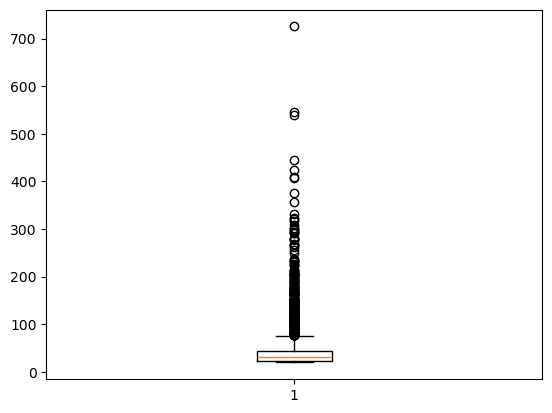

In [18]:
#Making a boxplot: 
plt.boxplot(spotify_df['Track Score'])

(array([4.308e+03, 1.990e+02, 5.800e+01, 2.100e+01, 6.000e+00, 4.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 19.4,  90. , 160.6, 231.2, 301.8, 372.4, 443. , 513.6, 584.2,
        654.8, 725.4]),
 <BarContainer object of 10 artists>)

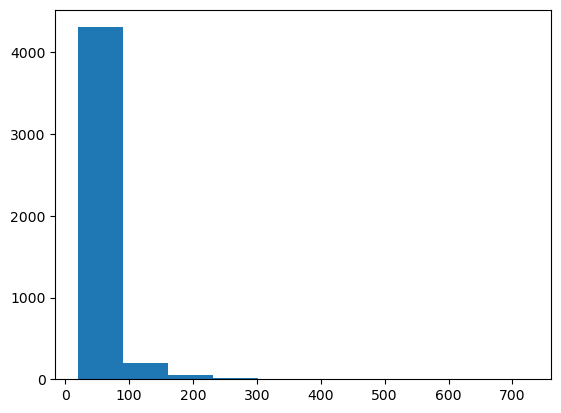

In [19]:
#Making a Histogram:
plt.hist(spotify_df['Track Score'])

#### Track Score is rating of a song based on various factors, likely scored by either critics or fans alike.
##### Immediate Observations:
    1) Our data is incredibly right skewed, with many tracks not achieving a score past 100. 
    2) As a result of how heavily skewed our data is, we get a large amount of outliers. 
    3) This means that only a select few songs are rated highly.

In [20]:
#Observing the 5 highest rated songs:
spotify_df.sort_values(by = 'Track Score').tail(5)

,,Track,All Time Rank,Track Score,Spotify Streams,YouTube Views,TikTok Views,Spotify Playlist Count,Spotify Popularity,YouTube Likes,Explicit,Release Date
Artist,Album,,,,,,,,,,,
Eminem,Houdini,Houdini,5.0,423.3,1.070349e+08,7.737396e+07,NaN,7223.0,88.0,3670188.0,Yes,2024-05-31
Miley Cyrus,Flowers - Single,Flowers,4.0,444.9,2.031281e+09,1.096101e+09,1.460373e+10,269802.0,85.0,10629796.0,No,2023-01-12
Artemas,I like the way you kiss me,i like the way you kiss me,3.0,538.4,6.013093e+08,1.225991e+08,3.369121e+09,54331.0,92.0,2228730.0,No,2024-03-19
Kendrick Lamar,Not Like Us,Not Like Us,2.0,545.9,3.237039e+08,1.163470e+08,2.083390e+08,28113.0,92.0,3486739.0,Yes,2024-05-04
Tommy Richman,Million Dollar Baby - Single,MILLION DOLLAR BABY,1.0,725.4,3.904709e+08,8.427475e+07,5.332282e+09,30716.0,92.0,1713126.0,No,2024-04-26


##### Looking at the last 5 entries, they seem to be all songs that were very popular in the last 2 years, with all going viral at some point at time.
##### Deeper Analysis:
    1) Million Dollar Baby was a song that dominated TikTok. It stood atop the #1 spot for 10 consecutive weeks, even debuting on the Hot 100 at #2. The song has an amazing story. It helped Tommy Richman's career explode through its success, as the artist grew up facing financial difficulties.

    2) The infamous diss track Not Like Us by Kendrick Lamar caught like fire across the internet, debuting at #1 on the Hot 100, even surpassing 1 billion streams. The song alone has given Lamar 5 different Grammys, and was performed at NFL's Superbowl 59(LIX) halftime show, which brought the song back into the #1 spot on Billboard's Hot 100. 
    
    3) Artemas's hit single garnered commercial success, reaching #12 on the U.S Billboard Hot 100. The song is exploding on TikTok, appearing in 300,000+ clips. The song recorded 8.3 million streams in its debut week.

    4) Flowers by Miley Cyrus is the fastest song on Spotify to achieve 100 million streams within its first week of release, with the song also reaching 1 billion streams in a record-breaking 112 days. The song stayed on the #1 spot of the Billboard Hot 100 for 8 weeks, and earned Cyrus the Grammys for Record of the Year, and Best Pop Solo Performance.
    
    5) Houdini was a song that peaked at #2 on the US Billboard Hot 100, an achievement shared by only 7 other songs in Eminem's discography. As of the time of writing, the song had been streamed 650 million times on Spotify and sold 49,000 copies. It was Eminem's highest charting single since "The Monster" a decade ago.

#### <span style=color:green>Observing Spotify Streams:</span>

{'whiskers': [<matplotlib.lines.Line2D at 0x2d6ec525810>,
 'caps': [<matplotlib.lines.Line2D at 0x2d6ec525a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d6ec5256d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2d6ec525d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d6ec525e50>],
 'means': []}

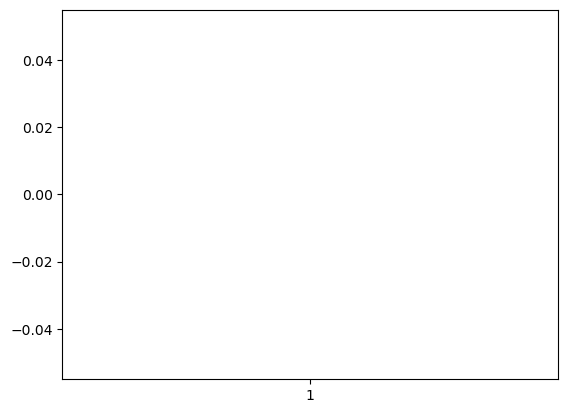

In [21]:
plt.boxplot(spotify_df['Spotify Streams'])

##### Strange, there seems to not be a boxplot. It's likely because of NA values, but before we fix this, let's see what our top 10 songs are:

In [22]:
#Observing the 10 most streamed songs:
spotify_df.sort_values(by = 'Spotify Streams', na_position = 'first').tail(10)

Track  \
Artist        Album                                                                                          
Drake         One Dance (feat. Wizkid & Kyla) - Single                                           One Dance   
The Weeknd    Starboy                                                                              Starboy   
Harry Styles  As It Was (Official Video)                                                         As It Was   
              As It Was                                                                          As It Was   
Post Malone   Sunflower (Spider-Man: Into the Spider-Verse)  Sunflower - Spider-Man: Into the Spider-Verse   
Lewis Capaldi Breach                                                                     Someone You Loved   
xSyborg       Shape of You                                                                    Shape of You   
Ed Sheeran    Shape of You                                                                    Shape of You   
xSyborg       Blinding Lights                                                              Blinding Lights   
The Weeknd    Blinding Lights                                                              Blinding Lights   

                                                             All Time Rank  \
Artist        Album                                                          
Drake         One Dance (feat. Wizkid & Kyla) - Single               518.0   
The Weeknd    Starboy                                                265.0   
Harry Styles  As It Was (Official Video)                            3410.0   
              As It Was                                               20.0   
Post Malone   Sunflower (Spider-Man: Into the Spider-Verse)          116.0   
Lewis Capaldi Breach                                                 133.0   
xSyborg       Shape of You                                          1807.0   
Ed Sheeran    Shape of You                                            54.0   
xSyborg       Blinding Lights                                       4229.0   
The Weeknd    Blinding Lights                                         56.0   

                                                             Track Score  \
Artist        Album                                                        
Drake         One Dance (feat. Wizkid & Kyla) - Single              67.9   
The Weeknd    Starboy                                               95.7   
Harry Styles  As It Was (Official Video)                            23.5   
              As It Was                                            292.0   
Post Malone   Sunflower (Spider-Man: Into the Spider-Verse)        143.9   
Lewis Capaldi Breach                                               129.7   
xSyborg       Shape of You                                          36.3   
Ed Sheeran    Shape of You                                         195.1   
xSyborg       Blinding Lights                                       20.5   
The Weeknd    Blinding Lights                                      194.0   

                                                             Spotify Streams  \
Artist        Album                                                            
Drake         One Dance (feat. Wizkid & Kyla) - Single          3.192204e+09   
The Weeknd    Starboy                                           3.291262e+09   
Harry Styles  As It Was (Official Video)                        3.299082e+09   
              As It Was                                         3.301815e+09   
Post Malone   Sunflower (Spider-Man: Into the Spider-Verse)     3.358704e+09   
Lewis Capaldi Breach                                            3.427499e+09   
xSyborg       Shape of You                                      3.888356e+09   
Ed Sheeran    Shape of You                                      3.909459e+09   
xSyborg       Blinding Lights                                   4.261328e+09   
The Weeknd    Blinding Lights                     

##### Immediate Observations: 
    1) All of ths songs here are by male artists, outside of the feature from Kyla in One Dance

    2) It seems that there are duplicate entries tied with the artists xSyborg. Upon exploring their Spottify page, I cannot Blinding Lights or Shape of You in their page. Looking up the artist on song on Youtube, we see that the artist's Shape of you cover was taken down, but his Bliding Lights 'cover' is still up. The song is a 1 for 1 copy of the original, except the artist tags are replaced for xSyborg and others. 

    3) Of all of the songs, Starboy is the only explicit track present. 

    4) The Weeknd appears twice (Blinding Lights and Star Boy)

##### Seeing this, we might want to remove NaNs and clean our dataset, so this doesn't occur with the rest of our data:

#### <span style=color:green>Deleting NAs:</span>

In [23]:
spotify_df = spotify_df.dropna()

In [24]:
#Obseriving the top 10 without NA's present:
spotify_df.sort_values(by = 'Spotify Streams').tail(10)

,,Track,All Time Rank,Track Score,Spotify Streams,YouTube Views,TikTok Views,Spotify Playlist Count,Spotify Popularity,YouTube Likes,Explicit,Release Date
Artist,Album,,,,,,,,,,,
Imagine Dragons,Believer,Believer,119.0,142.2,3.006227e+09,4.495060e+09,5.876459e+09,335880.0,81.0,42240881.0,No,2017-01-31
Tones And I,Dance Monkey,Dance Monkey,40.0,214.5,3.071214e+09,3.366447e+09,5.861940e+09,375201.0,71.0,27240268.0,No,2019-05-10
The Kid LAROI,STAY (with Justin Bieber),STAY (with Justin Bieber),27.0,266.3,3.107100e+09,1.256974e+09,2.371238e+10,451732.0,78.0,14661425.0,Yes,2021-07-09
Drake,One Dance (feat. Wizkid & Kyla) - Single,One Dance,518.0,67.9,3.192204e+09,4.568069e+08,3.885441e+08,379853.0,82.0,5068762.0,No,2016-04-04
The Weeknd,Starboy,Starboy,265.0,95.7,3.291262e+09,2.829991e+09,3.754982e+08,366133.0,84.0,14968547.0,Yes,2016-09-22
Harry Styles,As It Was,As It Was,20.0,292.0,3.301815e+09,8.008993e+08,1.540588e+10,407119.0,87.0,9101589.0,No,2022-03-31
Post Malone,Sunflower (Spider-Man: Into the Spider-Verse),Sunflower - Spider-Man: Into the Spider-Verse,116.0,143.9,3.358704e+09,2.763189e+09,1.597454e+09,392082.0,79.0,19410390.0,No,2018-10-18
Lewis Capaldi,Breach,Someone You Loved,133.0,129.7,3.427499e+09,2.153702e+09,2.161032e+09,338763.0,82.0,20891433.0,No,2018-11-08
Ed Sheeran,Shape of You,Shape of You,54.0,195.1,3.909459e+09,8.013997e+09,2.320856e+09,316378.0,80.0,45770887.0,No,2017-01-06


##### New Observations made based on our cleaned dataset: 
    1) We now have a female artist represented, with Tones and I's Dance Monkey

    2) Every song here has above 3 billion streams, ~1/3 of the global population.

    3) Despite being 8th in overall streams, Kid Laroi's Stay (feat. Justin Beiber) is the 2nd most added song to Spotify Playlists.

    4) Compared to everyone else's YouTube Likes, Drake's One Dance has significantly fewer likes in comparison to the songs. It's also the oldest song on the list, released in 2016. 

##### Let's quickly regraph Spotify Streams to see the actual distribution:

{'whiskers': [<matplotlib.lines.Line2D at 0x2d6ec590410>,
 'caps': [<matplotlib.lines.Line2D at 0x2d6ec590690>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d6ec5902d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2d6ec590910>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d6ec590a50>],
 'means': []}

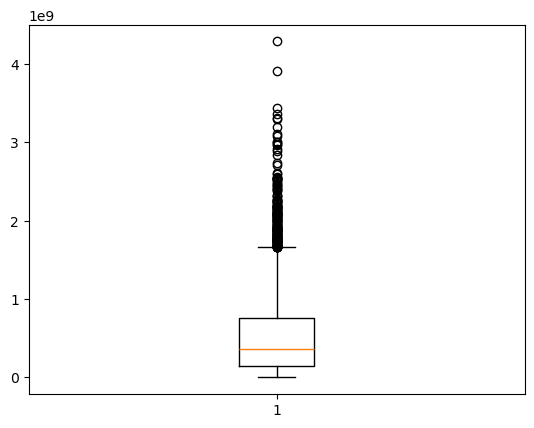

In [25]:
plt.boxplot(spotify_df['Spotify Streams'])

Like our previous plot for Track Score, it seems that our data is skewed right. However, atleast this time we are able to create an actual boxplot. Tihs means that our data has a handful of songs that far suprass the others in Spotify Streams when compared to the general population. 

#### <span style=color:green>Observing Spotify Playlist Count:</span>

{'whiskers': [<matplotlib.lines.Line2D at 0x2d6ec556fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2d6ec557250>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d6ec556e90>],
 'medians': [<matplotlib.lines.Line2D at 0x2d6ec5574d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d6ec557610>],
 'means': []}

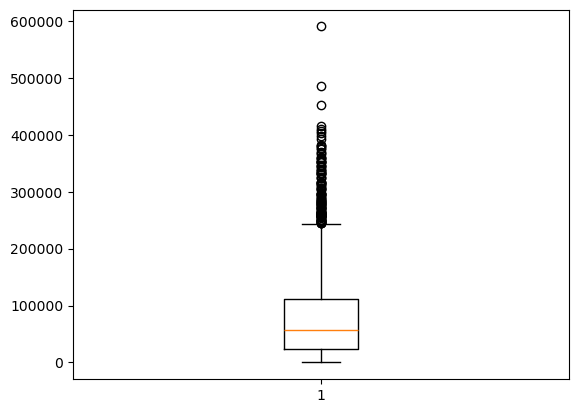

In [26]:
plt.boxplot(spotify_df['Spotify Playlist Count'])

##### Once again, we see a right skewed distribution.

In [27]:
spotify_df.sort_values(by = 'Spotify Playlist Count').tail(10)

,,Track,All Time Rank,Track Score,Spotify Streams,YouTube Views,TikTok Views,Spotify Playlist Count,Spotify Popularity,YouTube Likes,Explicit,Release Date
Artist,Album,,,,,,,,,,,
Travis Scott,Birds In The Trap Sing McKnight,goosebumps,549.0,65.5,2.396738e+09,1.334796e+09,1.545294e+09,381756.0,82.0,12947143.0,Yes,2016-09-16
Post Malone,Sunflower (Spider-Man: Into the Spider-Verse),Sunflower - Spider-Man: Into the Spider-Verse,116.0,143.9,3.358704e+09,2.763189e+09,1.597454e+09,392082.0,79.0,19410390.0,No,2018-10-18
Eminem,The Source - Hip Hop Hits Vol. 6,Without Me,3210.0,24.3,2.146682e+09,3.477305e+08,1.778901e+08,397228.0,83.0,3552978.0,Yes,2002-01-01
J. Cole,2014 Forest Hills Drive,No Role Modelz,955.0,49.3,2.235161e+09,6.563102e+08,8.852734e+08,403355.0,81.0,4852226.0,Yes,2014-12-09
Harry Styles,As It Was,As It Was,20.0,292.0,3.301815e+09,8.008993e+08,1.540588e+10,407119.0,87.0,9101589.0,No,2022-03-31
Nirvana,Nevermind (30th Anniversary Edition Super Deluxe),Smells Like Teen Spirit,4510.0,19.6,2.021910e+09,3.480817e+08,7.202839e+08,410054.0,77.0,4710499.0,No,1991-09-24
The Neighbourhood,I'm Sorry...,Sweater Weather,809.0,53.9,2.916413e+09,1.648486e+09,2.911384e+09,415650.0,85.0,18338729.0,No,2012-01-01
The Kid LAROI,STAY (with Justin Bieber),STAY (with Justin Bieber),27.0,266.3,3.107100e+09,1.256974e+09,2.371238e+10,451732.0,78.0,14661425.0,Yes,2021-07-09
Glass Animals,Heat Waves,Heat Waves,71.0,175.0,2.996181e+09,1.272898e+09,5.518430e+09,486278.0,82.0,14947520.0,No,2020-06-29


##### Observations: 
    1) We see a difference in the most streamed songs compared to the most added songs, with only 4 songs appearing in both tables.
    2) Every track has atleast 2 billion streams. 
    3) There is a subnstancial difference of adds to playists between Blinding Lights and Heat Waves, differing in 100,000 streams.

### <span style=color:green>Performing Look ups:</span>

#### <span style=color:green>How many entries are by x artist?:</span>

##### <span style=color:green>The Weeknd:</span>

##### It seems because we decided to group index by artist and album we are unable to search by artist or album.

In [28]:
#Making a copy: 
dup_spotify_df = spotify_df
dup_spotify_df = dup_spotify_df.reset_index()

In [29]:
#How many entries are of the Weeknd?:
(dup_spotify_df['Artist'] == 'The Weeknd').sum()

np.int64(26)

In [30]:
#Checking how many of the tracks are explicit: 
(dup_spotify_df[(dup_spotify_df['Artist'] == 'The Weeknd') & (dup_spotify_df['Explicit'] == 'Yes')]).shape[0]

13

In [31]:
### Looking at the specific entries: 
dup_spotify_df[dup_spotify_df['Artist'] == 'The Weeknd']

,Artist,Album,Track,All Time Rank,Track Score,Spotify Streams,YouTube Views,TikTok Views,Spotify Playlist Count,Spotify Popularity,YouTube Likes,Explicit,Release Date
40,The Weeknd,Blinding Lights,Blinding Lights,56.0,194.0,4.281469e+09,8.338071e+08,3.501177e+09,590392.0,83.0,10093211.0,No,2019-11-29
197,The Weeknd,Starboy,Starboy,265.0,95.7,3.291262e+09,2.829991e+09,3.754982e+08,366133.0,84.0,14968547.0,Yes,2016-09-22
283,The Weeknd,After Hours,Save Your Tears,371.0,79.9,1.995512e+09,3.652577e+08,1.154404e+09,304456.0,80.0,2699016.0,Yes,2020-03-20
295,The Weeknd,The Hills,The Hills,388.0,77.5,2.306741e+09,2.404495e+09,1.174129e+09,333310.0,80.0,15819333.0,Yes,2015-05-27
464,The Weeknd,"My Dear Melancholy,",Call Out My Name,603.0,61.6,1.780890e+09,1.366385e+09,7.429021e+08,229909.0,79.0,10766000.0,No,2018-03-29
634,The Weeknd,I Feel It Coming,I Feel It Coming,817.0,53.6,1.749088e+09,1.489648e+09,3.643700e+04,193568.0,72.0,7616181.0,No,2016-11-17
657,The Weeknd,Your Songs 2015,Can't Feel My Face,851.0,52.6,1.747535e+09,1.689191e+09,2.645727e+08,212829.0,76.0,8927108.0,No,2015-03-02
677,The Weeknd,After Hours (Deluxe),Save Your Tears (with Ariana Grande) (Remix),884.0,51.4,1.549318e+09,3.858846e+08,4.265111e+08,178149.0,73.0,4302435.0,No,2020-03-20
818,The Weeknd,Take My Breath,Take My Breath - Single Version,1085.0,45.9,4.653484e+08,2.188900e+08,2.249553e+08,89586.0,57.0,2186587.0,No,2021-08-05
856,The Weeknd,The Highlights (Deluxe),Popular (with Playboi Carti & Madonna) - Music...,1142.0,44.5,8.129541e+08,6.636968e+07,7.970412e+08,137681.0,81.0,851906.0,Yes,2021-02-05


#### Oberservations:
    1) Interestingly, we see that as the indices increase, the track score decreases. 
    2) Outside of Starboy - Live and Blinding Lights instrumental, every song was able to obtain at least 100,000,000 streams.
    3) exactly half of the entries(13/26) in this list are labeled explicit.
    4) The Highlights album appears the most, being represented by 4 different tracks. After Hours and Star Boy are tied in 2nd, both appearing 3 other songs. 
    5) Fantasy has significantly fewer YouTube Likes than the other songs(753k). 

##### <span style=color:green>BTS:</span>

In [32]:
# How about BTS?
(dup_spotify_df[dup_spotify_df['Artist'] == 'BTS']).shape[0]

12

In [33]:
#Looking at entries:
dup_spotify_df[dup_spotify_df['Artist'] == 'BTS']

,Artist,Album,Track,All Time Rank,Track Score,Spotify Streams,YouTube Views,TikTok Views,Spotify Playlist Count,Spotify Popularity,YouTube Likes,Explicit,Release Date
92,BTS,Dynamite,Dynamite,131.0,132.3,1.872578e+09,2.638957e+09,5.063720e+09,144619.0,74.0,62311179.0,No,2020-08-21
229,BTS,Butter,Butter,302.0,87.5,1.257974e+09,1.175755e+09,8.120633e+09,90160.0,70.0,27744989.0,No,2021-05-21
422,BTS,MAP OF THE SOUL : PERSONA,Boy With Luv (feat. Halsey),553.0,65.0,1.165843e+09,2.104798e+09,2.199922e+09,62333.0,70.0,35291841.0,No,2019-04-12
560,BTS,Butter / Permission to Dance,Permission to Dance,728.0,56.8,6.757631e+08,8.810724e+08,3.653167e+09,43682.0,68.0,29073682.0,No,2021-07-09
1197,BTS,BE,Life Goes On,1594.0,36.7,7.177154e+08,6.402254e+08,1.177172e+09,43805.0,70.0,19718272.0,No,2020-11-20
1248,BTS,Love Yourself ï¿½ï¿½ï¿½ 'A,IDOL,1670.0,35.7,4.588428e+08,1.476805e+09,6.643284e+08,26775.0,65.0,24898525.0,No,2018-08-24
1326,BTS,Love Yourself ï¿½ï¿½ï¿½,DNA,1778.0,34.5,6.327279e+08,1.758382e+09,5.373598e+08,26053.0,63.0,26790883.0,No,2017-09-18
1431,BTS,MAP OF THE SOUL : 7,ON,1939.0,32.9,4.524919e+08,9.456397e+08,3.596622e+08,26714.0,64.0,27589023.0,No,2020-02-21
1941,BTS,Proof,Yet To Come,2656.0,27.3,3.447446e+08,2.649154e+08,9.730862e+08,16095.0,64.0,15060408.0,No,2022-06-10
2423,BTS,Black Swan,Black Swan,3342.0,23.7,4.599240e+08,6.033507e+08,5.358351e+08,28314.0,64.0,14962059.0,No,2020-01-17


##### Observations:
    1) Whenever there is a non-ASCI word (in this case, a Korean letter), the system has no clue what the character is, outptting ½ï¿ in response.
    2) Much like the Weeknd, we see no song less than 100 million streams for BTS. 
    3) There is not a single explicit track.
    4) We have no duplicate albums appearing, as exactly one song.
    5) Compared to the other songs, Take Two has significantly less YouTube likes(2.3 mil).

# <span style=color:blue>Part 5: Correlation and Hypthoesis Testing</span>

## <span style=color:green> Is there a correlation between Spotify Streams and Youtube Views? (R/Pearson's Coefficent)</span>

#### <span style=color:green> Checking conditions needed for Pearson's Coefficient </span>

##### 1. Lineartity

Text(0.5, 1.0, 'Scatterplot of Spotify Streams vs YouTube Views')

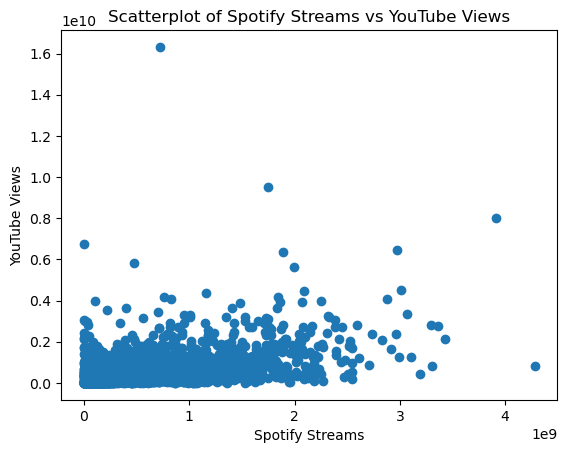

In [34]:
#Create a scatterplot of both variables: 
x = spotify_df['Spotify Streams']
y = spotify_df['YouTube Views']
plt.scatter(x, y)
plt.xlabel('Spotify Streams')
plt.ylabel('YouTube Views')
plt.title('Scatterplot of Spotify Streams vs YouTube Views')

##### Our data seems to not show a distinct lineaar pattern, but atleast it doesn't show a quadratic/other distinct patterns.

##### 2. Normality

###### Because we have more than 30 data points, by CLT we know that our data is approximately normally distributed.

##### 3. Constant Variance

Text(0.5, 1.0, 'Scatterplot for Constant Varaince')

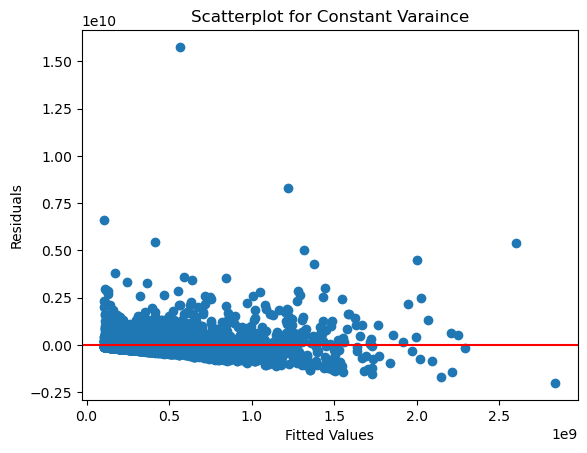

In [35]:
#Creating a OLS model:
intercept = sm.add_constant(x)
model = sm.OLS(y, intercept).fit()

#Finding Residuals: 
residuals = model.resid

#Fitted Values:
fitted_values = model.fittedvalues

#Scatterplot of both:
plt.scatter(fitted_values, residuals)
plt.axhline(0, color = 'red', linestyle ='-')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Scatterplot for Constant Varaince')

###### Looks like the overall scatter of our residuals/fitted values are very similar to the regular scatterplot we did ealrier. The scatter seems to be somewhat random, though a lot of our data points seem to lean towards the positive side. 

##### 4. Outliers

###### Judging by both scatterplots, we can clearly see the presence of multiple outliers, most obvious being the one at the top left of both graphs. WE must be aware that our r will likely be inaccurate due to these large outliers

#### While we may have barely passed/failed some of the conditions, let's see what a hypothetical r coefficent looks like:

#### <span style=color:green> Running r/r^2 </span>

In [36]:
#Finding both variables: 
r2 = model.rsquared
r = r2**0.5

#Printing the following results:
print(f"r = {r}")
print(f"r^2 = {r2}")

r = 0.4734587239221655
r^2 = 0.22416316325800534


##### The following results show:
    r: There is a somewhat positive relationship between Spotify Streams and YouTube Views
    r^2: About 22% of the variation in YouTube Views can be explained by the linear relationship from Spotify Streams.

##### Colnclusions: 
    1) There is a slight postitive correlation between the amount of Spotify Streams and YouTube Views, meaning if a song does well on Spotify, theres a good chance it's YouTube Views does well too. 

    2)Because of our rather low r^2, this means there are likely other statistics that influence how many YouTube Views a song gets outside of just Spotify Streams.

    3) We cannot be completly confident in these results because of the conditions that we checked earlier, but it gives us a rough idea of what to expect. 

# <span style=color:green> Running a hypothesis test (p-values) </span>

### Does Spotify Streams statistically influence the amount of YouTube Views?
**Confidence Level**: 95%  
**Null hypothesis**: $H_0: \beta_1 = 0$  
**Alternative hypothesis**: $H_1: \beta_1 \ne 0$

In [37]:
p_value = model.pvalues['Spotify Streams']
print(f"P-value = {p_value}")

P-value = 4.197812545642132e-181


##### The p-value of 4.197812545642132e-181 is ~0

##### Conclusion: because our p-value (close to 0) is less than our significane level 0.05(1 - 0.95), there is strong statistical evidence that Sptoify Streams affect the amount of YouTube Views a song achieves. The following argument supports our conclusion made earlier that the response and predictor have a linear relationship.

## <span style=color:green> Observing Outliers (Cook's Distance) </span>

#### What is Cook's Distance?  
##### **Idea:** Combines leverage (points from mean), and residuals(predicted point from the actual point).
##### **Aim:** Identify influential data points that have a large impact on the model's coefficents. (Find bad predictors and unusual data points)

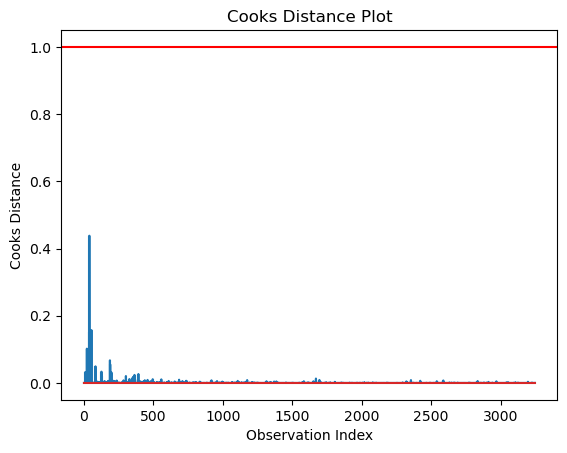

In [38]:
#Finding Influencial points:
influence = model.get_influence()

#Find all of the distances and p-value associated with the Distance Test
(cook_dist, p_vals) = influence.cooks_distance 

plt.stem(cook_dist,markerfmt= '-')
plt.xlabel('Observation Index')
plt.ylabel('Cooks Distance')
plt.title('Cooks Distance Plot')
plt.axhline(1, color = 'red', linestyle= '-')

##### While one of our points reaches around 0.45, the rest do not come close in distance. This means that our data points suggest that no high-leverage outliers are distorting the model (influencing the model).

#### Looking at the most influencal data points:

In [39]:
#Looking at the top 5 outliers:

#Coverting cooks distance into a df:
cooks_df = pd.DataFrame({
    'index': spotify_df.index,
    'cooks_distance': cook_dist
})

#Sorting by cooks distance:
sorted_cooks_df = cooks_df.sort_values('cooks_distance', ascending = False)

#Finding the Top 5 :
sorted_cooks_df.head()

,index,cooks_distance
39,"(Ed Sheeran, Shape of You)",0.438160
54,"(Ed Sheeran, ýý (Deluxe))",0.157293
37,"(Luis Fonsi, Despacito (Featuring Daddy Yankee))",0.152131
21,"(Pinkfong, ýýýýýýýýý ýýýýýý ýýýýýýýýýýýý)",0.101950
40,"(The Weeknd, Blinding Lights)",0.074214


##### Observations:
    1) It seems that our largest outlier is Ed Sheeran's Shape of you, which has about 2 billion more views on YouTube(6.4B) than Spotify Streams (4.4B) upon a deeper analysis. The reason this may have such a high score is due the the song's likely unique combination of streams and YouTube views.
    2) Despacito is likely also an outlier due to how popular the song was used in jokes/memes, acheiving 8.7B views on YouTube, but only 1.9B streams on Spotify
    3) With the decline in music videos, it's not a huge surprise that The Weeknd's Blinding Lights didn't perform on YouTube as it did on Spotify. However, what is shocking is the amount of streams (4.9B) it achieved, while YouTube Views(943M) were great, clearly did not perform as well as on Spotify. Yet despite this, Blinding Lights is likely one of the songs that has achieved the most MV streams in the last 5 years, making it a unique case.


# <span style=color:blue>Part 6: (Multiple) Linear Regression</span>

## <span style=color:green> Is there a linear relationship between Spotify Streams, Spotify Playlist Count and Popularity?</span>

#### <span style=color:green> Checking for Linearity: </span>

In [1]:
#Create a residuals/fitted values plot

#Identifying variables: 
x = spotify_df[['Spotify Playlist Count', 'Spotify Popularity']]
y = spotify_df['Spotify Streams']
#Constants:
con_x = sm.add_constant(x) #Makes a intercept
SS_SPC_P_model = sm.OLS(y, con_x).fit() 
predictions = SS_SPC_P_model.predict(con_x) #Makes predictions based on the trained model and intercept.
residuals = y - predictions

# Initialize the plot:
sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={"color": "red"}) #Creates the plot, alongside a line that helps describe the distribution.
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

NameError: name 'spotify_df' is not defined

##### Observation: It seems that our residuals have a pattern, showing that the following variables are not linear. 

#### <span style=color:green> Checking for Independence: </span>

##### <span style=color:green> We will be using Durbin Watson's Statistic: </span>

#### What is Durbin Watson's Statistic?  
##### **Idea:** Numericalizes autocorrelation in residuals.
##### **Aim:** Checks whether there is correlation between a residual and the residual from the previous time step within a time series.
##### **Interpretation**: 2>: Negative autocorrenation, ~2: No autocorrelation, 2<: Posititve autocorrelation

In [41]:
#Finding the statistic: 
durbin_watson(residuals)

np.float64(1.8983780012344178)

##### Because our Durbin Watson statistic is close to 2, we can stat there is no auto correlation

#### <span style=color:green> Checking for Homoscedasticity (Constant Variance): </span>

##### Checking our residual plot, we can see that there is clearly a funnel shape in our residuals, showing that there is NOT constant variance. 

#### <span style=color:green> Checking for Normality in Residuals: </span>

Text(0.5, 1.0, 'Histogram of Residuals')

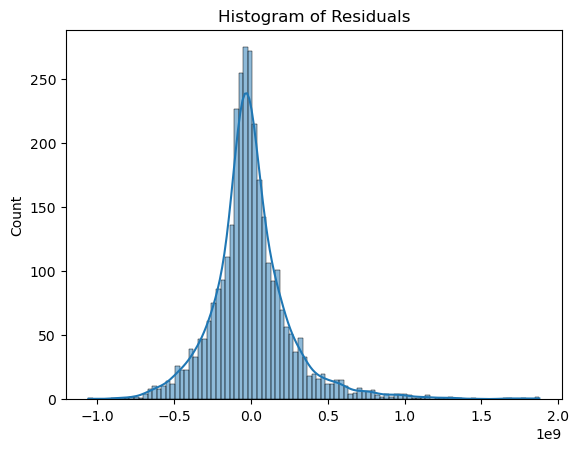

In [42]:
# Making a Q-Q Plot of our residuals:
sns.histplot(residuals, kde=True) #kde = True: displays a smoothed density curve
plt.title("Histogram of Residuals")

#### Because our data roughly represents a bell curve, it shows that our data is approximately normal

#### <span style=color:green> Checking for Multicollinearity: </span>

In [43]:
#We will achieve this using VIF:
vif_data = pd.DataFrame()
vif_data['feature'] = con_x.columns
vif_data['VIF'] = [variance_inflation_factor(con_x.values, i) for i in range(len(con_x.columns))]
print(vif_data)

                  feature        VIF
0                   const  24.525212
1  Spotify Playlist Count   1.211593
2      Spotify Popularity   1.211593


##### Because all of our features (Spotify Count, Spotify Popularity) both have a low VIF factor, we can safely say that there is no multicollinearity between features

#### <span style=color:green> Checking for Outliers: </span>

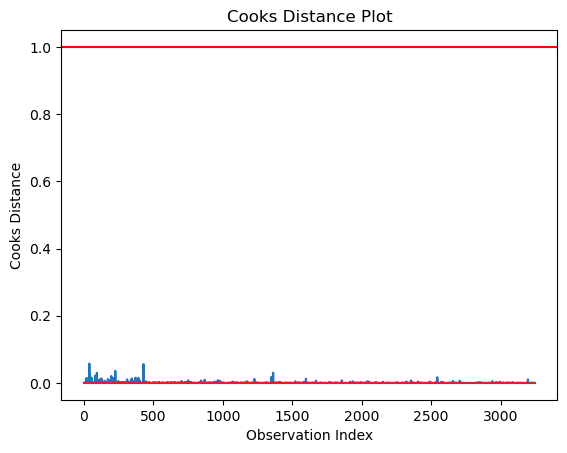

In [44]:
#Finding Influencial points:
influence = SS_SPC_P_model.get_influence()

#Find all of the distances and p-value associated with the Distance Test
(cook_dist, p_vals) = influence.cooks_distance 

plt.stem(cook_dist,markerfmt= '-')
plt.xlabel('Observation Index')
plt.ylabel('Cooks Distance')
plt.title('Cooks Distance Plot')
plt.axhline(1, color = 'red', linestyle= '-')

##### Because all of our data points have a fairly low distance (0.10>), this means there is likely no highly influenctial data points in our model.

#### Despite not passing all of the tests, let's run a hypthotectical model

#### <span style=color:green> Full Model: </span>

In [45]:
#Recall:
x = spotify_df[['Spotify Playlist Count', 'Spotify Popularity']]
y = spotify_df['Spotify Streams']
#Constants:
con_x = sm.add_constant(x)

full_model = sm.OLS(y, con_x).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Spotify Streams   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     5151.
Date:                Sun, 13 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:32:11   Log-Likelihood:                -67594.
No. Observations:                3247   AIC:                         1.352e+05
Df Residuals:                    3244   BIC:                         1.352e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.856e+08   2.31e+07     -8.030      0.000   -2.31e+08    -1.4e+08
Spotify Playlist Count  6041.8697     69.071     87.473      0.000    5906.442    6177.297
Spotify Popularity      3.837e+06   3.76e+05     10.214      0.000     3.1e+06    4.57e+06
==============================================================================
Omnibus:                      938.894   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5405.695
Skew:                           1.249   Prob(JB):                         0.00
Kurtosis:                       8.807   Cond. No.                     5.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### <span style=color:green> Subset Models: </span>

In [46]:
#Model with Spotify Playlist Count:
x1 = spotify_df['Spotify Playlist Count']
con_x1 = sm.add_constant(x1)
x1_model = sm.OLS(y, con_x1).fit()
x1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Spotify Streams   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     9883.
Date:                Sun, 13 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:32:11   Log-Likelihood:                -67646.
No. Observations:                3247   AIC:                         1.353e+05
Df Residuals:                    3245   BIC:                         1.353e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.999e+07   6.93e+06      5.774      0.000    2.64e+07    5.36e+07
Spotify Playlist Count  6336.6979     63.742     99.412      0.000    6211.720    6461.676
==============================================================================
Omnibus:                      868.991   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4560.592
Skew:                           1.174   Prob(JB):                         0.00
Kurtosis:                       8.310   Cond. No.                     1.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
#Model with Spotify Popularity:
x2 = spotify_df['Spotify Popularity']
con_x2 = sm.add_constant(x2)
x2_model = sm.OLS(y, con_x2).fit()
x2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Spotify Streams   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     789.3
Date:                Sun, 13 Jul 2025   Prob (F-statistic):          1.22e-155
Time:                        15:32:11   Log-Likelihood:                -69561.
No. Observations:                3247   AIC:                         1.391e+05
Df Residuals:                    3245   BIC:                         1.391e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -5.981e+08   4.15e+07    -14.424      0.000   -6.79e+08   -5.17e+08
Spotify Popularity  1.757e+07   6.25e+05     28.094      0.000    1.63e+07    1.88e+07
==============================================================================
Omnibus:                     1107.889   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3959.887
Skew:                           1.691   Prob(JB):                         0.00
Kurtosis:                       7.223   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations:
    1) We achieve a massive F-stat of 5151, meaning that atleast one of our predictors is meaningful to this model.
    2)A r^2/adj. r^2 of about 0.76 show that there is a strong postitive association between our independent and dependent variables.

#### Disclaimer: We cannot assume the following results and observations are 100% accurate, the following statistics offer a general idea of the relationships between all predictors

#### Observartions:
    1) Both the Full Model and the x1 model show a strong posititve correlation (r^2/adj. r^2 ~0.75), While the x2 model shows a rather weak posititve correlation(~0.20)
    2)All Models have a large F-statistic, meaning all of the model's predictors are statistically meaningful(Atleast one is meaninful in the full model)
    3)All models have large AIC/BIC values, with the full model having the smallest (1.352e+05) than the rest. 
    4) If we had to choose the best model of the 3, we would choose the Full Model, because it has the smallest AIC, BIC values, a strong r^2/adj. r^2, and a massive f-stat.

##### Conclusion: Spotify Playlist Counts and Spotify Popularity both seem to have an influence on the amount of streams a song achieves. 

# <span style=color:blue>Part 7: K-Fold Cross Validation</span>

#### What is a K-Fold Cross Validation?
##### **Idea:** Splits our data into k equal folds, and evaluates a models standard error.
##### **Aim:** Trains the model k times. Each attempt using k-1 folds while using 1 fold for testing. The result tells us how much variability is shown between predictions based on trained data.

#### <span style=color:green> Running K-Folds on our Data: </span>

In [48]:
#Setting up k-folds
kf = KFold(n_splits=10, shuffle=True, random_state=123)

#Intializing MSE Scores:
mse_score = []

#Setting up K-fold Cross Validation (For Full Model)
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #Adding a contant to training and test sets:
    x_train_const = sm.add_constant(x_train)
    x_test_const = sm.add_constant(x_test)

    #Making predictions
    y_pred = full_model.predict(x_test_const)

    #Calculating the MSE:
    mse = mean_squared_error(y_test, y_pred)
    mse_score.append(mse)

#Average Standard Error:
avg_mse = np.mean(mse_score)
#We can use RMSE to bring the error back into the original units of y-value
rmse = math.sqrt(avg_mse)
print(avg_mse)
print(rmse)

7.068833790605807e+16
265872785.19257677


#### <span style=color:green> Checking minimum and maximum amount of streams in our dataset: </span>

In [49]:
print(spotify_df['Spotify Streams'].max())
print(spotify_df['Spotify Streams'].min())

4281468720.0
6300.0


#### <span style=color:green> Conclusion: </span>

#### Observation: Our predictons for Spotify Streams given we use Spotify Playlist Count and Spotify Popularity will on average, give us a standard error of 7.068833790605807e+16, and the root mean square error would be 265872785.2. 

##### Interpretation: This means that on average, predictions will be off by about 265872785.2 streams. This enormous number indicates that our predictions vary significantly. Still, given that the number of streams for many of these songs ranges from thousands to billions, I believe this is a fair standard error(Our data is also heavily skewed).

# <span style=color:blue>Part 8: Principal Component Analysis: </span>

#### What is PCA?
##### **Idea:** Simplifies dataset by removing collinearity, assuming all features are on the same scale. 
##### **Aim:** Reduce dimensions, finding uncorrelated components and new features. This helps with reducing the amount of dimensions/variables needed in a model

## <span style=color:green> Can we improve a multi-variable model by projecting features into fewer dimensions?</span>

###  <span style=color:green> Setting up PCA</span>

In [50]:
#Selecting Features to be on our analysis:
x = spotify_df[['Spotify Playlist Count', 'Spotify Popularity', 'Spotify Streams', 'YouTube Views', 'TikTok Views']]

#Standardizing our data(ensuring all data is accounted for equally): 
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

#PCA:
pca = PCA(n_components = 2)
x_pca_c2 = pca.fit_transform(x_scaled)

#Showing component varaince and total variance:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.48084185 0.20376012]
0.6846019733962163


#### Observation: Our first principal component captures the highest varaince of 0.48084185, while the 2nd highest varying component gives us a varance of 0.20376012.

##### Interpretation: This means that both of these components explain about 65% of the variance in our original data, given the components we selected. This means that there is still a good amount of data that needs to be captured. 

###  <span style=color:green> Adding another component:</span>

In [51]:
#PCA:
pca = PCA(n_components = 3)
x_pca_c3 = pca.fit_transform(x_scaled)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.48084185 0.20376012 0.17619888]
0.8608008576695885


#### Observation: Our first principal component captures the highest variance of 0.48084185, the 2nd highest varying component gives us a variance of 0.20376012, and the 3rd component explained 0.17619888 of the variance.

##### Interpretation: All components were able to account for 86% of the variance in the original data. This is better than our model with only 2 components, but adds more complexity to our model.

####  <span style=color:green> Conclusion: If we wanted to explain a sufficient amount of variance given we have 6 variables, we would only need 3 principal components to capture 86% of the total variance. </span>


###  <span style=color:green> Graphing the explained varaince:</span>

Text(0.5, 1.0, 'Cumulative Explained Variance by Principal Components')

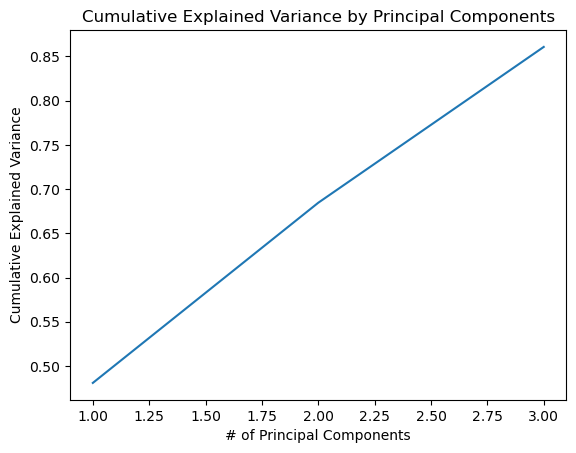

In [52]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')

##### We see through this graph that there seems to be a slight bend at 2 components, showing that as we increase the amount of components pass 2, there will be less varaince explained by the rest of the componments

# <span style=color:blue>Part 9: Conclusion: </span>

## <span style=color:green>Part 3 (Data Cleaning): </span>
    1) Similar to the anime data analysis project, we see a diverse range of variables. While the options are nice, I don't need to work with every platform (Pandora, Soundcloud, etc). 
    2) Ordering and understanding the variable names proved to be difficlt too. I didn't fully understand what a track score was based on, or what an all-time rank was based on. It was for these reasons that I needed to do independent research to either delete the variables or rarely use them. 
    3) To simplify lookups, I decided to use artist names and album as the index/secondary index respectively. This also groups our data nicely.     

## <span style=color:green>Part 4 (Exploratory Data Analysis):<span>
    1) A lot of our variables appeared skewed. This is likely because there are billions of songs that are released every year, with only a few that break out of the 'norm' are renouned songs by the masses, through popularity, playlist additions, or other factors.
    2) Because we had NA's present in our data, we were unable to create graphs for certain variables. This was due to overlapping information, where either songs had duplicates, or certain music that was available on one platform was not on another. 

## <span style=color:green>Part 5 (R/Correlation): <span>
    1) When our data is so heavily skewed like this Spotify one, we will often fail many conditions, including linearity, normality, and outliers. 
    2) Because our p-value (close to 0) is less than our significane level 0.05(1 - 0.95), there is strong statistical evidence that Spotify Streams affect the amount of YouTube Views a song achieves. The following argument supports our conclusion made earlier that the response and predictor have a linear relationship.
    3) While we did see many outliers within our data, there was only 1 of our data points had leverage and could somewhat distort our model.

## <span style=color:green>Part 6 (Multiple Linear Regression/ANOVA): <span>
    1) Spotify Playlist Counts and Spotify Popularity both seem to have an influence on the amount of streams a song achieves. 
    2) If we had to choose the best model of the 3, we would choose the Full Model, because it has the smallest AIC, BIC values(1.352e+05), a strong r^2/adj. r^2(0.753), and a massive f-stat(9883).

## <span style=color:green>Part 7 (K-Fold for various variables):<span>
    1) On average, predictions will be off by about 265872785.2 streams. This enormous number indicates that our predictions vary significantly. Still, given that the number of streams for many of these songs ranges from thousands to billions, I believe this is a fair standard error(Our data is also heavily skewed).
    2) Because of its large RMSE, this also means that our model will likely be inaccurate when predicting less popular songs.


## <span style=color:green>Part 8 (PCA for all numeric variables):<span>
    1)With 2 components, I was able to explain about 65% of the variance in our original data. This means that there is still a good amount of data that needs to be captured. 
    2) With 3 components, I accounted for 86% of the variance in the original data. This is better than our model with only 2 components(65%), but adds more complexity to our model.
    3)While we can add more principal components, we want to balance complexity with explanatory power. Since the first 3 components explain 86% of the variance(uncorrelated), adding more components would likely yield minimal additional explanatory power and another dimension of complexity.

# <span style=color:blue>Part 10: Closing Thoughts: </span>

## <span style=color:green>Discoveries:<span>
    1) Learning about concepts like Cook's Distance and Durbin Watson's statistic was the first time I decided to learn new statistical concepts for a project. While they were fairly minor concepts, they taught me the idea of statistically measuring different concepts, which I found interesting/unique.
    2) Through the Exploratory Data Analysis, I was able to learn more about trending music and write summaries for different tracks through independent research of each. 
    3) I was able to practice the different machine learning techniques taught in various courses (STA 108/141) like Multiple Linear Regression, K-Means, and PCA through this project, reaffirming my knowledge for the subject and getting to practice it.

## <span style=color:green>Future Improvements:<span>
    1) Do more Machine Learning techniques like LOOCV, forest clustering, Trees, etc.
    2) Work with a dataset that is not skewed. This makes it so that our data is accurastely represented when drawing conclusions. 